In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df_obj =df.select_dtypes(include='object')


In [10]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [11]:
pd.get_dummies(df_obj)

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [12]:
df = pd.concat([df,pd.get_dummies(df_obj)],axis=1)

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,0,1,0,1,0,1,0,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,0,0,0,1,0,1,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
df.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [16]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,...,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,...,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,...,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,...,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


In [18]:
df.corr()['HeartDisease'].sort_values(ascending=True)[:-1]

ST_Slope_Up         -0.622164
ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_F               -0.305445
Cholesterol         -0.232741
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.107589
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
Name: HeartDisease, dtype: float64

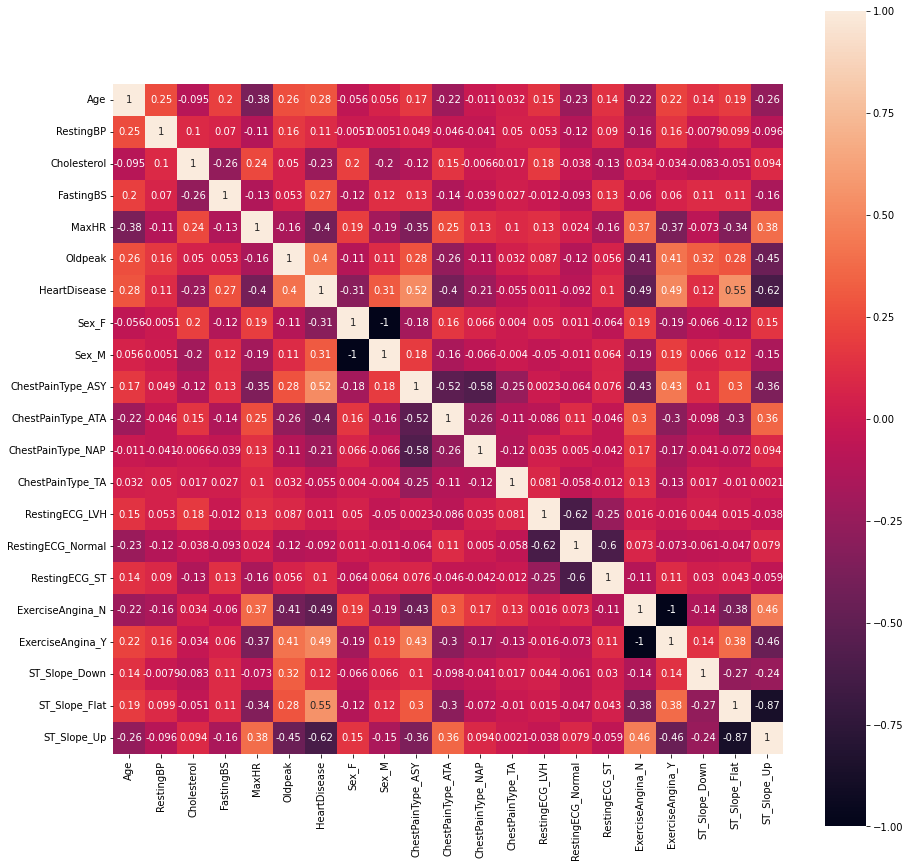

In [19]:
#Correlation map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,square=True) 
plt.show()

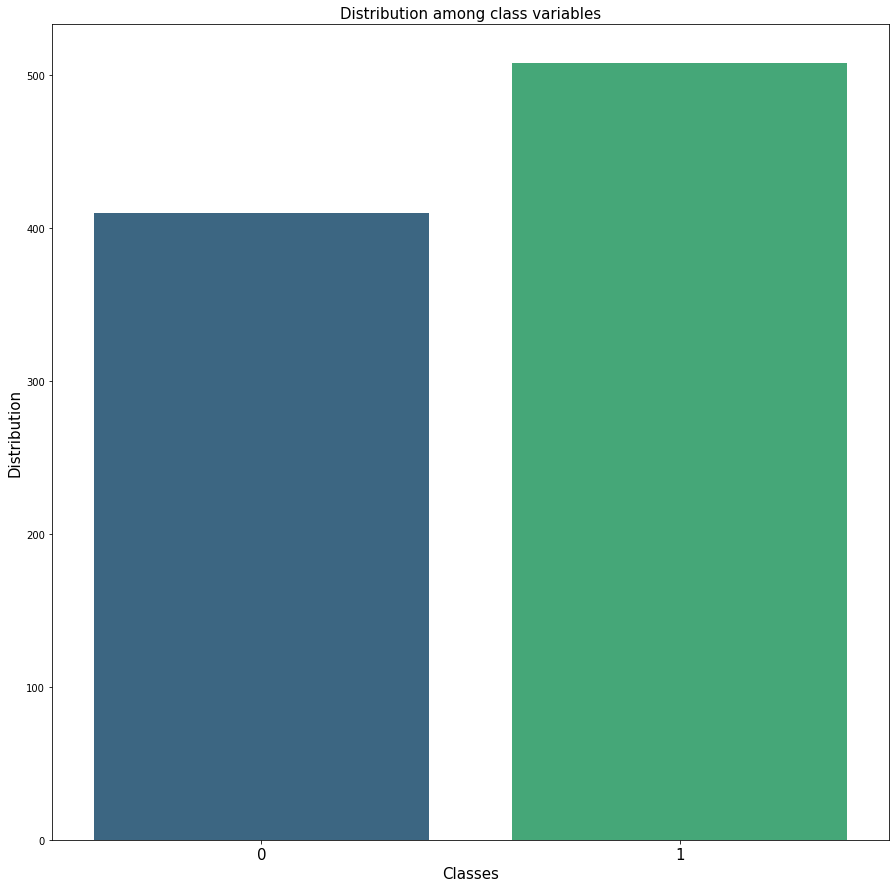

In [20]:
plt.figure(figsize=(15,15))

sns.countplot(x ='HeartDisease', data = df, palette = 'viridis')

plt.title('Distribution among class variables', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.xticks(fontsize = 15)

# Show the plot
plt.show()

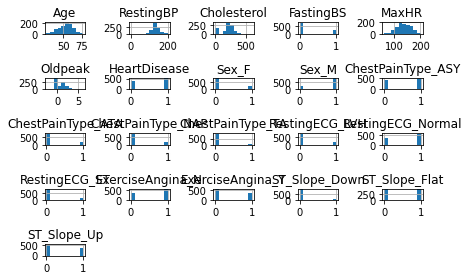

In [21]:
# Histogram shows the distribution of each feature
df.hist(xrot = 1, )
plt.tight_layout()
plt.show()  

In [22]:
sns.pairplot(data=df, hue="HeartDisease")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x125fb0a60> (for post_execute):


KeyboardInterrupt: 

In [23]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)


In [43]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test score with naive bayes: ", nb.score(x_test,y_test))
nb_score = nb.score(x_test,y_test)

test score with naive bayes:  0.8315217391304348


In [26]:
y_pred_nb = nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("NB result confusion matrix : \n", cm)

NB result confusion matrix : 
 [[66 19]
 [12 87]]


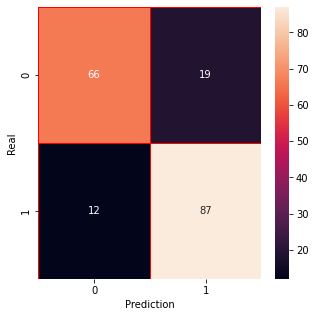

In [27]:
#confusion metrics visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

In [28]:
# plt.scatter(df.Age,df.HeartDisease)
sns.pairplot(df,hue="HeartDisease",diag_kind="hist")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x125fb0a60> (for post_execute):


KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        85
           1       0.82      0.88      0.85        99

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Confusion Matrix : 
 [[66 19]
 [12 87]]


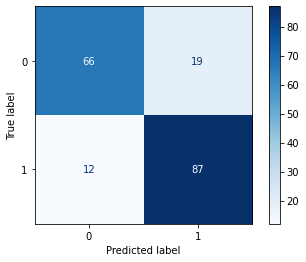

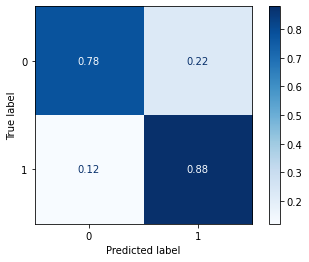

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred_nb))

class_names = df.HeartDisease.unique()

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

nb_acc = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the model : ", nb_acc)

Accuracy of the model :  0.8315217391304348


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Random forest model accuracy is 0.8315217391304348
The confusion matrix of Random Forest Model is
[[64 21]
 [10 89]]


In [37]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(x_train, y_train)

test_pred = abcl.predict(x_test)
abcl_score=abcl.score(x_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.8260869565217391
The confusion matrix of Adaboost Ensemble model is
[[65 20]
 [12 87]]


In [38]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.8152173913043478
The confusion matrix of Bagging classifier model is
[[68 17]
 [17 82]]


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.8206521739130435
The confusion matrix of Gradient Boost classifier model is
[[63 22]
 [11 88]]


In [45]:
print("The Naive Bayes model accuracy is {}".format(nb_score))
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Naive Bayes model accuracy is 0.8315217391304348
The Random forest model accuracy is 0.8315217391304348
The Adaboost Ensemble model accuracy is 0.8260869565217391
The Bagging classifier model accuracy is 0.8152173913043478
The Gradient Boost classifier model accuracy is 0.8206521739130435
